    INTRODUCTION
The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) from: City from which the flight takes off. It is a categorical feature having 6 unique cities.
3) dep_time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
4) Stop: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
5) arr_time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
6) to: City where the flight will land. It is a categorical feature having 6 unique cities.
7) time_taken: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset:

In [5]:
df_bus = pd.read_csv('business.csv')
df_bus['class'] = 'business'
df_eco = pd.read_csv('economy.csv')
df_eco['class'] = 'economy'
df = pd.concat([df_eco,df_bus], axis = 0)
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy


### Checking the basic informations of the datasets:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300261 entries, 0 to 93486
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        300261 non-null  object
 1   airline     300261 non-null  object
 2   ch_code     300261 non-null  object
 3   num_code    300261 non-null  int64 
 4   dep_time    300261 non-null  object
 5   from        300261 non-null  object
 6   time_taken  300261 non-null  object
 7   stop        300261 non-null  object
 8   arr_time    300261 non-null  object
 9   to          300261 non-null  object
 10  price       300261 non-null  object
 11  class       300261 non-null  object
dtypes: int64(1), object(11)
memory usage: 29.8+ MB


In [8]:
df.shape

(300261, 12)

In [9]:
df.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
class         0
dtype: int64

In [10]:
df[df.duplicated()]

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
563,14-02-2022,Air India,AI,807,17:20,Delhi,15h 15m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,08:35,Mumbai,"12,150",economy
6181,13-03-2022,Air India,AI,475,13:00,Delhi,24h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,13:35,Mumbai,"4,780",economy


### Checking for the anomolies:

In [12]:
# taking the columns as a list:
columns = df.columns.to_list()
columns

['date',
 'airline',
 'ch_code',
 'num_code',
 'dep_time',
 'from',
 'time_taken',
 'stop',
 'arr_time',
 'to',
 'price',
 'class']

In [13]:
sep_col = ['airline', 'ch_code', 'num_code', 'from', 'stop', 'to']

In [14]:
# check the value distribution in the above separated columns:
for i in sep_col:
    print((df[i].value_counts(normalize=True))*100)
    print('--------------------')

airline
Vistara      42.582620
Air India    26.941228
Indigo       14.360839
GO FIRST      7.718951
AirAsia       5.361336
SpiceJet      3.001056
StarAir       0.020316
Trujet        0.013655
Name: proportion, dtype: float64
--------------------
ch_code
UK    42.582620
AI    26.941228
6E    14.360839
G8     7.718951
I5     5.361336
SG     3.001056
S5     0.020316
2T     0.013655
Name: proportion, dtype: float64
--------------------
num_code
808     1.103373
706     1.077396
772     0.952505
774     0.935186
720     0.882566
          ...   
9991    0.000333
150     0.000333
5003    0.000333
6613    0.000333
9923    0.000333
Name: proportion, Length: 1255, dtype: float64
--------------------
from
Delhi        20.430559
Mumbai       20.283353
Bangalore    17.353569
Kolkata      15.435571
Hyderabad    13.608161
Chennai      12.888787
Name: proportion, dtype: float64
--------------------
stop
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t                      81.130417
non-stop

### Treating the anomolies and duplicates:

In [16]:
df.drop_duplicates(inplace = True)

In [17]:
df[df.duplicated()]

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class


In [18]:
import pandas as pd
import re

def extract_location_info(text):
    # Clean the string by removing newlines and tabs
    clean_text = re.sub(r'[\n\t]', ' ', text).strip()
    
    # Split the string into words
    words = clean_text.split()
    
    # Extract the first part (e.g., "1-stop") and last part (e.g., "Mysore")
    first_part = words[0]  # First word (e.g., "1-stop")
    last_part = words[-1]  # Last word (e.g., "Mysore")
    
    return first_part, last_part

# Apply the function to the 'Location' column
df[['stop', 'city']] = df['stop'].apply(lambda x: pd.Series(extract_location_info(x)))

# Show the updated DataFrame
df.head()


,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,city
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy,non-stop
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy,non-stop
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy,non-stop
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy,non-stop
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy,non-stop


In [19]:
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,city
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy,non-stop
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy,non-stop
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy,non-stop
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy,non-stop
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy,non-stop


In [20]:
df['stop'].unique()

array(['non-stop', '1-stop', '2+-stop'], dtype=object)

In [21]:
df['city'].unique()

array(['non-stop', '1-stop', 'IXU', 'Chennai', 'Indore', 'RPR', '2+-stop',
       'Lucknow', 'GOP', 'Raipur', 'Nagpur', 'Surat', 'Hyderabad', 'STV',
       'IDR', 'VTZ', 'Guwahati', 'NAG', 'Vishakhapatnam', 'NDC', 'IXE',
       'Patna', 'PAT', 'Mangalore', 'Mumbai', 'KLH', 'MYQ', 'Kolkata',
       'Delhi', 'Kolhapur', 'JRG', 'Bhubaneswar', 'Ranchi', 'IXR', 'JGB',
       'BBI', 'Mysore', 'GAY', 'GAU', 'HYD'], dtype=object)

In [22]:
df['city'].value_counts()

city
1-stop            243601
non-stop           36044
2+-stop            13288
IXU                 1839
IDR                 1398
Patna                674
Indore               381
PAT                  354
MYQ                  321
Bhubaneswar          301
KLH                  284
JGB                  193
JRG                  175
STV                  169
BBI                  158
Delhi                153
Hyderabad            143
IXE                  120
Ranchi               114
Raipur               102
Chennai               77
Guwahati              55
Mysore                45
Mangalore             39
Mumbai                31
Kolkata               28
VTZ                   27
Nagpur                25
NDC                   22
RPR                   22
GOP                   16
Surat                 14
Lucknow               13
NAG                    9
Vishakhapatnam         8
Kolhapur               5
IXR                    4
GAY                    3
GAU                    3
HYD                 

In [23]:
df.replace({'non-stop': 'no_stop', '1-stop':'one_stop', '2+-stop': '2+_stops'}, inplace = True)

In [24]:
df['stop'].unique()

array(['no_stop', 'one_stop', '2+_stops'], dtype=object)

In [25]:
df.rename(columns = {'from': 'departure_city', 'to':'destination_city'}, inplace = True)

In [26]:
df.columns

Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'departure_city',
       'time_taken', 'stop', 'arr_time', 'destination_city', 'price', 'class',
       'city'],
      dtype='object')

In [27]:
# Changing the datatypes of the columns as required:

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300259 entries, 0 to 93486
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   date              300259 non-null  object
 1   airline           300259 non-null  object
 2   ch_code           300259 non-null  object
 3   num_code          300259 non-null  int64 
 4   dep_time          300259 non-null  object
 5   departure_city    300259 non-null  object
 6   time_taken        300259 non-null  object
 7   stop              300259 non-null  object
 8   arr_time          300259 non-null  object
 9   destination_city  300259 non-null  object
 10  price             300259 non-null  object
 11  class             300259 non-null  object
 12  city              300259 non-null  object
dtypes: int64(1), object(12)
memory usage: 32.1+ MB


In [29]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

In [30]:
df['price'] = df['price'].str.replace(',','').astype('float')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300259 entries, 0 to 93486
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              300259 non-null  datetime64[ns]
 1   airline           300259 non-null  object        
 2   ch_code           300259 non-null  object        
 3   num_code          300259 non-null  int64         
 4   dep_time          300259 non-null  object        
 5   departure_city    300259 non-null  object        
 6   time_taken        300259 non-null  object        
 7   stop              300259 non-null  object        
 8   arr_time          300259 non-null  object        
 9   destination_city  300259 non-null  object        
 10  price             300259 non-null  float64       
 11  class             300259 non-null  object        
 12  city              300259 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usa

In [32]:
# Function to categorize times into segments
def categorize_time(dep_time):
    hour = int(dep_time.split(':')[0])
    if 4 <= hour < 8:
        return 'early morning'
    elif 8 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 16:
        return 'noon'
    elif 16 <= hour < 20:
        return 'evening'
    elif 20 <= hour <= 24:
        return 'night'
    else:
        return 'late night'

# Apply the function to the 'arr_time' column
df['dep_time'] = df['dep_time'].apply(categorize_time)
# Display the first few rows of the updated dataframe
df.head()


,date,airline,ch_code,num_code,dep_time,departure_city,time_taken,stop,arr_time,destination_city,price,class,city
0,2022-02-11,SpiceJet,SG,8709,evening,Delhi,02h 10m,no_stop,21:05,Mumbai,5953.0,economy,no_stop
1,2022-02-11,SpiceJet,SG,8157,early morning,Delhi,02h 20m,no_stop,08:40,Mumbai,5953.0,economy,no_stop
2,2022-02-11,AirAsia,I5,764,early morning,Delhi,02h 10m,no_stop,06:35,Mumbai,5956.0,economy,no_stop
3,2022-02-11,Vistara,UK,995,morning,Delhi,02h 15m,no_stop,12:35,Mumbai,5955.0,economy,no_stop
4,2022-02-11,Vistara,UK,963,morning,Delhi,02h 20m,no_stop,11:10,Mumbai,5955.0,economy,no_stop


In [33]:
# Function to categorize times into segments
def categorize_time(arr_time):
    hour = int(arr_time.split(':')[0])
    if 4 <= hour < 8:
        return 'early morning'
    elif 8 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 16:
        return 'noon'
    elif 16 <= hour < 20:
        return 'evening'
    elif 20 <= hour <= 24:
        return 'night'
    else:
        return 'late night'

# Apply the function to the 'arr_time' column
df['arr_time'] = df['arr_time'].apply(categorize_time)
# Display the first few rows of the updated dataframe
df.head()

,date,airline,ch_code,num_code,dep_time,departure_city,time_taken,stop,arr_time,destination_city,price,class,city
0,2022-02-11,SpiceJet,SG,8709,evening,Delhi,02h 10m,no_stop,night,Mumbai,5953.0,economy,no_stop
1,2022-02-11,SpiceJet,SG,8157,early morning,Delhi,02h 20m,no_stop,morning,Mumbai,5953.0,economy,no_stop
2,2022-02-11,AirAsia,I5,764,early morning,Delhi,02h 10m,no_stop,early morning,Mumbai,5956.0,economy,no_stop
3,2022-02-11,Vistara,UK,995,morning,Delhi,02h 15m,no_stop,noon,Mumbai,5955.0,economy,no_stop
4,2022-02-11,Vistara,UK,963,morning,Delhi,02h 20m,no_stop,morning,Mumbai,5955.0,economy,no_stop


In [34]:
import re

# Enhanced function to handle variations in 'time_taken' formats
def convert_to_minutes_enhanced(time_str):
    if pd.isnull(time_str):
        return None
    # Extract hours and minutes using regex
    match = re.match(r"(?:(\d+)\.?(\d*)h)?\s*(?:(\d+)m)?", time_str.strip())
    if match:
        hours = int(match.group(1)) if match.group(1) else 0
        minutes = int(match.group(3)) if match.group(3) else 0
        return hours * 60 + minutes
    return None

# Apply the enhanced function to clean and convert the 'time_taken' data
df['time_taken'] = df['time_taken'].apply(convert_to_minutes_enhanced)
df['time_taken'] = df['time_taken']/60

# Basic statistics
df['time_taken'].describe()

count    300259.000000
mean         12.217706
std           7.192924
min           0.833333
25%           6.750000
50%          11.250000
75%          16.166667
max          49.833333
Name: time_taken, dtype: float64

In [35]:
df.head()

,date,airline,ch_code,num_code,dep_time,departure_city,time_taken,stop,arr_time,destination_city,price,class,city
0,2022-02-11,SpiceJet,SG,8709,evening,Delhi,2.166667,no_stop,night,Mumbai,5953.0,economy,no_stop
1,2022-02-11,SpiceJet,SG,8157,early morning,Delhi,2.333333,no_stop,morning,Mumbai,5953.0,economy,no_stop
2,2022-02-11,AirAsia,I5,764,early morning,Delhi,2.166667,no_stop,early morning,Mumbai,5956.0,economy,no_stop
3,2022-02-11,Vistara,UK,995,morning,Delhi,2.250000,no_stop,noon,Mumbai,5955.0,economy,no_stop
4,2022-02-11,Vistara,UK,963,morning,Delhi,2.333333,no_stop,morning,Mumbai,5955.0,economy,no_stop


In [36]:
df.shape

(300259, 13)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300259 entries, 0 to 93486
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              300259 non-null  datetime64[ns]
 1   airline           300259 non-null  object        
 2   ch_code           300259 non-null  object        
 3   num_code          300259 non-null  int64         
 4   dep_time          300259 non-null  object        
 5   departure_city    300259 non-null  object        
 6   time_taken        300259 non-null  float64       
 7   stop              300259 non-null  object        
 8   arr_time          300259 non-null  object        
 9   destination_city  300259 non-null  object        
 10  price             300259 non-null  float64       
 11  class             300259 non-null  object        
 12  city              300259 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usag

 * Anomolies have been treated, dataset is ready to be explored

### Feature engineering:

In [40]:
df['day_of_week'] = df['date'].dt.day_name()
df['day_of_week'].unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

## Univariate analysis:

In [42]:
# Separating the numerical and categorical data
num = df.select_dtypes(include = np.number).columns.to_list()
categorical = df.select_dtypes(exclude = np.number).columns.to_list()

In [43]:
num

['num_code', 'time_taken', 'price']

In [44]:
categorical

['date',
 'airline',
 'ch_code',
 'dep_time',
 'departure_city',
 'stop',
 'arr_time',
 'destination_city',
 'class',
 'city',
 'day_of_week']

In [45]:
cat = ['airline',
 'ch_code',
 'dep_time',
 'departure_city',
 'stop',
 'arr_time',
 'destination_city',
 'city',
 'day_of_week']

### Numerical columns:

In [47]:
for i in num:
    print(i)
    print(df[i].describe())
    print('-------------')

num_code
count    300259.000000
mean       1417.776883
std        1974.519951
min         101.000000
25%         637.000000
50%         818.000000
75%         927.000000
max        9991.000000
Name: num_code, dtype: float64
-------------
time_taken
count    300259.000000
mean         12.217706
std           7.192924
min           0.833333
25%           6.750000
50%          11.250000
75%          16.166667
max          49.833333
Name: time_taken, dtype: float64
-------------
price
count    300259.000000
mean      20883.800386
std       22695.962230
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64
-------------


 * Average time taken by the flights to reach the destination is 11.54 Hours.
 * Travel duration of the flights ranges from 0.83 hours to 49.83 hours suggesting a wide range of travel duration.
 * Average ticket price for the economic class is Rs.6571.17.
 * Minimum and maximum fares of the economic class tickets are around Rs.1105 and Rs.42349 respectively indicating that there is a good range of ticket prices within the economic class tickets.
 * The distribution of all three columns seems to have skewed right , showing that there are instances where the value is higher pushing the value to the tail of the dataset.

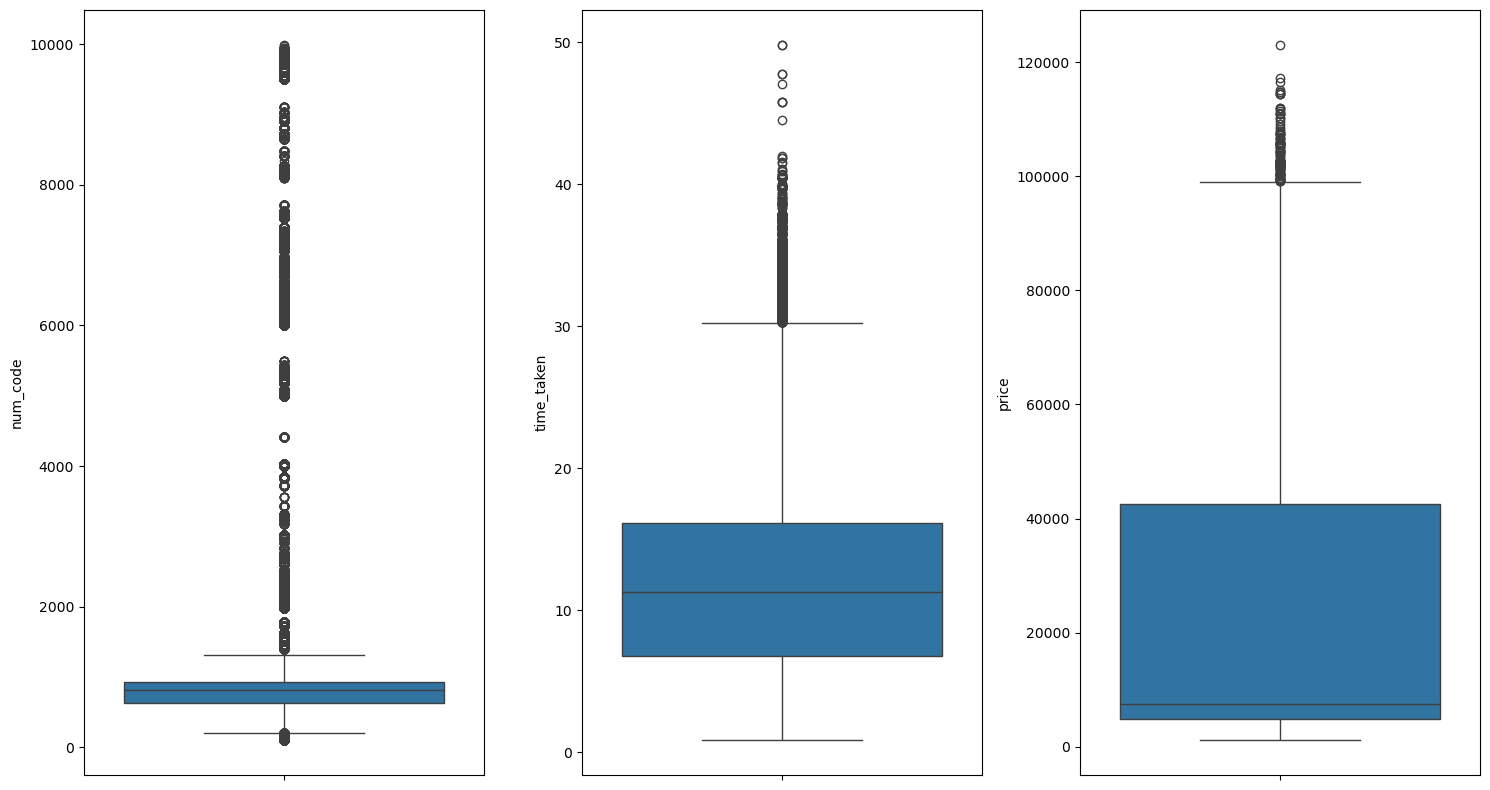

In [49]:
plt.figure(figsize=(15,8))
t= 1
for i in num:
    plt.subplot(1,3,t)
    sns.boxplot(df[i])
    t+=1

plt.tight_layout()
plt.show()

 * Outliers in the 'time_taken' and 'price' columns are very high

In [51]:
def outlier(i):
    q1 = np.quantile(df[i], 0.25)
    q3 = np.quantile(df[i], 0.75)
    iqr = q3 - q1
    lower = q1 - 2 * iqr
    upper = q3 + 2 * iqr
    print(upper)
    print(lower)
    return df[(df[i]< lower) | (df[i] > upper)]

In [52]:
outlier('time_taken')

35.0
-12.083333333333336


,date,airline,ch_code,num_code,dep_time,departure_city,time_taken,stop,arr_time,destination_city,price,class,city,day_of_week
10542,2022-02-14,Air India,AI,9887,early morning,Delhi,36.916667,2+_stops,evening,Bangalore,12321.0,economy,2+_stops,Monday
20466,2022-02-13,Vistara,UK,815,morning,Delhi,35.833333,2+_stops,evening,Kolkata,17462.0,economy,2+_stops,Sunday
29419,2022-02-17,Air India,AI,481,morning,Delhi,36.916667,2+_stops,night,Hyderabad,10474.0,economy,2+_stops,Thursday
29420,2022-02-17,Air India,AI,435,early morning,Delhi,39.666667,2+_stops,night,Hyderabad,10474.0,economy,2+_stops,Thursday
29536,2022-02-18,Air India,AI,481,morning,Delhi,36.916667,2+_stops,night,Hyderabad,10474.0,economy,2+_stops,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63418,2022-03-28,Vistara,UK,720,early morning,Kolkata,35.083333,one_stop,evening,Bangalore,67710.0,business,one_stop,Monday
63535,2022-03-30,Vistara,UK,720,early morning,Kolkata,35.083333,one_stop,evening,Bangalore,67710.0,business,one_stop,Wednesday
76364,2022-02-12,Vistara,UK,860,early morning,Hyderabad,37.916667,one_stop,night,Kolkata,64733.0,business,one_stop,Saturday
86940,2022-02-16,Air India,AI,429,noon,Chennai,45.833333,2+_stops,morning,Bangalore,51928.0,business,2+_stops,Wednesday


In [53]:
df[df['time_taken']>28.75]

,date,airline,ch_code,num_code,dep_time,departure_city,time_taken,stop,arr_time,destination_city,price,class,city,day_of_week
82,2022-02-11,Air India,AI,801,evening,Delhi,29.333333,one_stop,night,Mumbai,16245.0,economy,one_stop,Friday
114,2022-02-11,Air India,AI,429,morning,Delhi,30.083333,one_stop,noon,Mumbai,24540.0,economy,Chennai,Friday
357,2022-02-13,Air India,AI,429,morning,Delhi,30.083333,one_stop,noon,Mumbai,15405.0,economy,Chennai,Sunday
363,2022-02-13,Air India,AI,801,evening,Delhi,29.333333,one_stop,night,Mumbai,16245.0,economy,one_stop,Sunday
546,2022-02-14,Air India,AI,429,morning,Delhi,30.083333,one_stop,noon,Mumbai,15720.0,economy,Chennai,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91062,2022-03-24,Air India,AI,569,early morning,Chennai,29.833333,one_stop,noon,Kolkata,54481.0,business,one_stop,Thursday
91149,2022-03-26,Air India,AI,569,early morning,Chennai,29.833333,one_stop,noon,Kolkata,54481.0,business,one_stop,Saturday
91221,2022-03-27,Air India,AI,440,early morning,Chennai,28.916667,one_stop,morning,Kolkata,55377.0,business,one_stop,Sunday
91305,2022-03-29,Air India,AI,440,early morning,Chennai,28.916667,one_stop,morning,Kolkata,55377.0,business,one_stop,Tuesday


<Axes: xlabel='stop', ylabel='time_taken'>

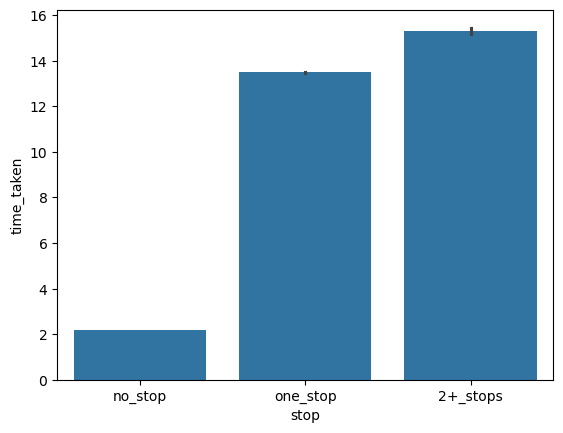

In [54]:
sns.barplot(x = df['stop'], y = df['time_taken'])

 * Flight having more than 2 stops have high duration than that of flights with one_stop and no_stop , thus creating the outliers.

In [56]:
outlier('price')

117997.0
-70693.0


,date,airline,ch_code,num_code,dep_time,departure_city,time_taken,stop,arr_time,destination_city,price,class,city,day_of_week
54711,2022-02-13,Vistara,UK,772,morning,Kolkata,13.5,one_stop,night,Delhi,123071.0,business,one_stop,Sunday


<Axes: xlabel='stop', ylabel='price'>

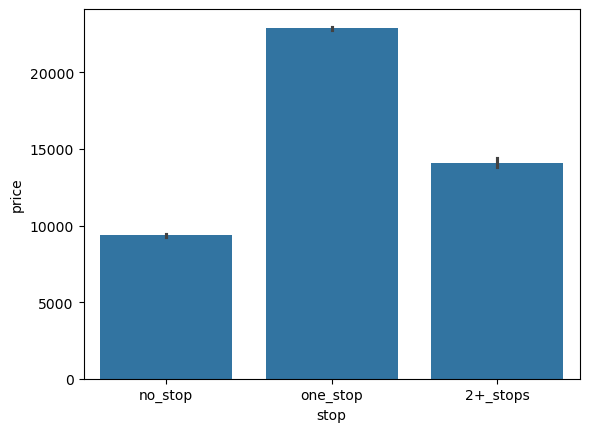

In [57]:
sns.barplot(x = df['stop'], y = df['price'])

 * The flight ticket price is also getting highly affected by the number of stops.

#### Measure of dispersion:

##### Skewness:

In [61]:
for i in num:
    print(f'Skewness of the column {i} is {df[i].skew()}')
    print()

Skewness of the column num_code is 2.816130569595276

Skewness of the column time_taken is 0.6029784255685438

Skewness of the column price is 1.0618818903392429



 * Skewness of the columns suggest that all three numerical columns are right skewed.

##### Kurtosis:

In [64]:
for i in num:
    print(f'Kurtosis value of the column {i} is {df[i].kurt()}')
    print()

Kurtosis value of the column num_code is 6.931508400618155

Kurtosis value of the column time_taken is -0.2689803307036893

Kurtosis value of the column price is -0.3951724294382908



##### Variance:

In [66]:
for i in num:
    print(f'Variance of the column {i} is {df[i].var()}')
    print()

Variance of the column num_code is 3898729.0371723277

Variance of the column time_taken is 51.73815248435815

Variance of the column price is 515106701.5414476



In [67]:
plt.rcParams['figure.figsize'] = [10,8]
from warnings import filterwarnings
filterwarnings('ignore')

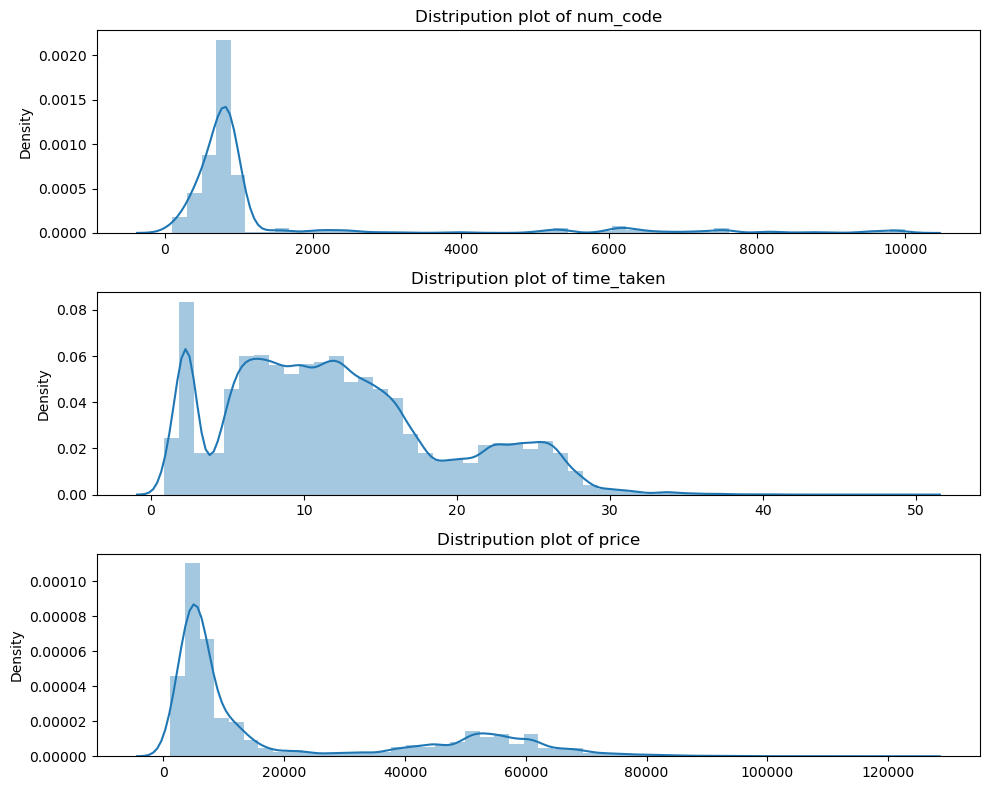

In [68]:
t = 1
for i in num:
    plt.subplot(3,1,t)
    sns.distplot(x = df[i])
    plt.title(f'Distripution plot of {i}')
    t+=1
plt.tight_layout()
plt.show()

#### Categorical:

In [70]:
for i in cat:
    print(i)
    print(df[i].describe())
    print('--------------------------')

airline
count      300259
unique          8
top       Vistara
freq       127859
Name: airline, dtype: object
--------------------------
ch_code
count     300259
unique         8
top           UK
freq      127859
Name: ch_code, dtype: object
--------------------------
dep_time
count      300259
unique          6
top       morning
freq        75250
Name: dep_time, dtype: object
--------------------------
departure_city
count     300259
unique         6
top        Delhi
freq       61343
Name: departure_city, dtype: object
--------------------------
stop
count       300259
unique           3
top       one_stop
freq        250927
Name: stop, dtype: object
--------------------------
arr_time
count     300259
unique         6
top        night
freq       93584
Name: arr_time, dtype: object
--------------------------
destination_city
count     300259
unique         6
top       Mumbai
freq       59107
Name: destination_city, dtype: object
--------------------------
city
count       300259
unique

In [71]:
plt.rcParams['figure.figsize'] = [15,15]

### Bivariate analysis:

#### NUM VS NUM:

In [74]:
# Checking the correlation:
df[num].corr()

,num_code,time_taken,price
num_code,1.000000,-0.133752,-0.212867
time_taken,-0.133752,1.000000,0.204478
price,-0.212867,0.204478,1.000000


#### Cat vs cat:

In [76]:
cat = ['airline','ch_code','dep_time','departure_city','stop','arr_time','destination_city','city','day_of_week', 'class']

#### Cat vs num:

In [78]:
num

['num_code', 'time_taken', 'price']

### Multi variate analysis:

##### num vs num vs cat:

##### Cat vs cat vs num:

### Encoding:

In [83]:
df_temp = df

In [84]:
from sklearn.preprocessing import OrdinalEncoder

In [85]:
df['stop'].unique()

array(['no_stop', 'one_stop', '2+_stops'], dtype=object)

In [86]:
categories = [['no_stop', 'one_stop', '2+_stops']]
o = OrdinalEncoder(categories=categories, dtype = int)

In [87]:
df_temp['stop'] = o.fit_transform(df_temp[['stop']])

In [88]:
df_temp['stop'].unique()

array([0, 1, 2])

In [89]:
df_temp.drop('city', axis = 1, inplace = True)
df_temp.drop('ch_code', axis = 1, inplace = True)

In [90]:
df_encoded = pd.get_dummies(df_temp, dtype='int', drop_first=True)

In [91]:
df_encoded.head()

,date,num_code,time_taken,stop,price,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,...,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_economy,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,2022-02-11,8709,2.166667,0,5953.0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
1,2022-02-11,8157,2.333333,0,5953.0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
2,2022-02-11,764,2.166667,0,5956.0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3,2022-02-11,995,2.250000,0,5955.0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
4,2022-02-11,963,2.333333,0,5955.0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


### Transformation:

In [93]:
for i in num:
    print(i)
    print(df_encoded[i].skew())
    print('-----------')

num_code
2.816130569595276
-----------
time_taken
0.6029784255685438
-----------
price
1.0618818903392429
-----------


In [94]:
from sklearn.preprocessing import PowerTransformer

In [95]:
p = PowerTransformer()
df_encoded['price'] = p.fit_transform(df_encoded[['price']])
df_encoded['price'].skew()

0.1131788008598758

In [96]:
df_encoded['time_taken'] = p.fit_transform(df_encoded[['time_taken']])
df_encoded['time_taken'].skew()

-0.061477852802671706

<Axes: xlabel='price', ylabel='Density'>

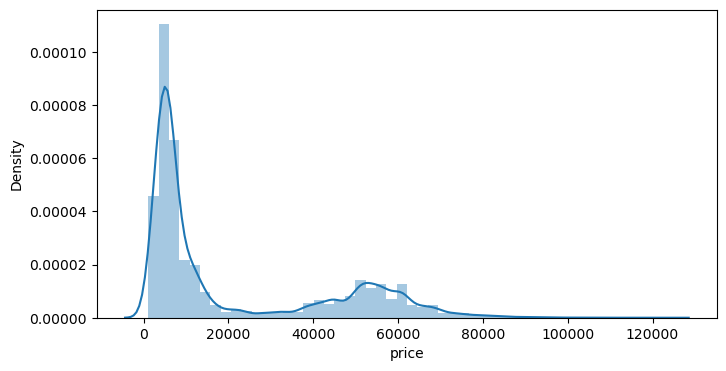

In [97]:
plt.rcParams['figure.figsize'] = [8,4]
sns.distplot(df['price'])

<Axes: xlabel='time_taken', ylabel='Density'>

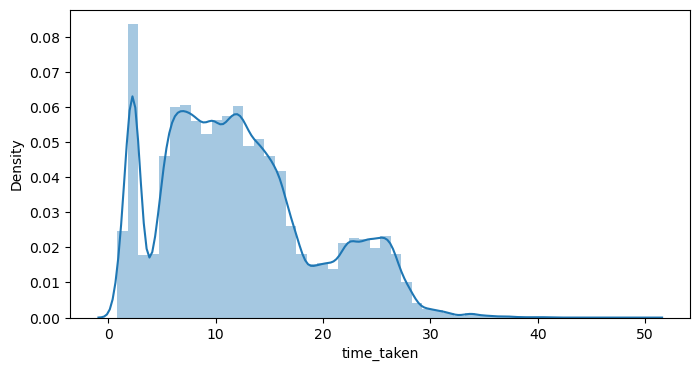

In [98]:
plt.rcParams['figure.figsize'] = [8,4]
sns.distplot(df['time_taken'])

## Model creation:

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, classification_report, f1_score,mean_absolute_percentage_error, root_mean_squared_error
from sklearn.metrics import roc_auc_score, mean_squared_error
lr = LinearRegression()

In [101]:
X = df_encoded.drop(['price', 'date'], axis = 1)
y = df_encoded['price']
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=10)
model = lr.fit(xtrain, ytrain)
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)
print(f'Training r2 score: {r2_score(ytrain, ypred_train)}')
print(f'Testing r2 score: {r2_score(ytest, ypred_test)}')
print(f'Train MAPE: {mean_absolute_percentage_error(ytrain, ypred_train)}')
print(f'Test MAPE: {mean_absolute_percentage_error(ytest, ypred_test)}')

Training r2 score: 0.8398510363169323
Testing r2 score: 0.838320343532968
Train MAPE: 2.9968226517233902
Test MAPE: 2.867261290131981


In [102]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
lasso = Lasso()
model_lasso = lasso.fit(xtrain, ytrain)
ypred_train = model_lasso.predict(xtrain)
ypred_test = model_lasso.predict(xtest)
print(f'Training r2 score: {r2_score(ytrain, ypred_train)}')
print(f'Testing r2 score: {r2_score(ytest, ypred_test)}')
print(f'Train MAPE: {mean_absolute_percentage_error(ytrain, ypred_train)}')
print(f'Test MAPE: {mean_absolute_percentage_error(ytest, ypred_test)}')

Training r2 score: 0.056492604425080195
Testing r2 score: 0.055654935120165616
Train MAPE: 1.7067036091708805
Test MAPE: 1.6984338570764372


In [103]:
ridge = Ridge()
model_ridge = ridge.fit(xtrain, ytrain)
ypred_train = model_ridge.predict(xtrain)
ypred_test = model_ridge.predict(xtest)
print(f'Training r2 score: {r2_score(ytrain, ypred_train)}')
print(f'Testing r2 score: {r2_score(ytest, ypred_test)}')
print(f'Train MAPE: {mean_absolute_percentage_error(ytrain, ypred_train)}')
print(f'Test MAPE: {mean_absolute_percentage_error(ytest, ypred_test)}')

Training r2 score: 0.8398509657388528
Testing r2 score: 0.8383207213861471
Train MAPE: 2.996764771433769
Test MAPE: 2.8672226280366973


In [104]:
en = ElasticNet()
model_en = en.fit(xtrain, ytrain)
ypred_train = model_en.predict(xtrain)
ypred_test = model_en.predict(xtest)
print(f'Training r2 score: {r2_score(ytrain, ypred_train)}')
print(f'Testing r2 score: {r2_score(ytest, ypred_test)}')
print(f'Train MAPE: {mean_absolute_percentage_error(ytrain, ypred_train)}')
print(f'Test MAPE: {mean_absolute_percentage_error(ytest, ypred_test)}')

Training r2 score: 0.05649279599142176
Testing r2 score: 0.05565530962257459
Train MAPE: 1.7075732687374512
Test MAPE: 1.6992923251692031


#### EDA:

In [181]:
df_bus = pd.read_csv('business.csv')
df_eco = pd.read_csv('economy.csv')
df_bus['class'] = 'business'
df_eco['class'] = 'economy'

df_raw = pd.concat([df_bus, df_eco], ignore_index=True)
df_raw.head(2)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",business
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",business


In [183]:
df_raw = df_raw.drop_duplicates()

df_raw['stop'] = df_raw['stop'].str.replace(r'1-stop[\s\S]*', 'one_stop', regex=True)
print(df_raw['stop'].unique())

df_raw.replace({'non-stop ': 'no_stop', '1-stop':'one_stop', '2+-stop': '2+_stop'}, inplace = True)

print(df_raw['stop'].unique())

df_raw['date'] = pd.to_datetime(df_raw['date'], format='%d-%m-%Y')
df_raw['day_of_week'] = df_raw['date'].dt.day_name()
df_raw['date'] = df_raw['date'].dt.day

df_raw['price'] = df_raw['price'].str.replace(',','').astype('float')

df_raw['arr_time'] = df_raw['arr_time'].str.replace(':','.').astype('float')
df_raw['dep_time'] = df_raw['dep_time'].str.replace(':','.').astype('float')

df_raw = df_raw.drop('ch_code', axis = 1)

['non-stop ' 'one_stop' '2+-stop']
['no_stop' 'one_stop' '2+_stop']


In [185]:
import re

# Enhanced function to handle variations in 'time_taken' formats
def convert_to_minutes_enhanced(time_str):
    if pd.isnull(time_str):
        return None
    # Extract hours and minutes using regex
    match = re.match(r"(?:(\d+)\.?(\d*)h)?\s*(?:(\d+)m)?", time_str.strip())
    if match:
        hours = int(match.group(1)) if match.group(1) else 0
        minutes = int(match.group(3)) if match.group(3) else 0
        return hours * 60 + minutes
    return None

# Apply the enhanced function to clean and convert the 'time_taken' data
df_raw['time_taken'] = df_raw['time_taken'].apply(convert_to_minutes_enhanced)
df_raw['time_taken'] = df_raw['time_taken']/60

# Basic statistics
print(df_raw['time_taken'].describe())

count    300259.000000
mean         12.217706
std           7.192924
min           0.833333
25%           6.750000
50%          11.250000
75%          16.166667
max          49.833333
Name: time_taken, dtype: float64


In [187]:
df_raw.head(2)

,date,airline,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,day_of_week
0,11,Air India,868,18.0,Delhi,2.00,no_stop,20.00,Mumbai,25612.0,business,Friday
1,11,Air India,624,19.0,Delhi,2.25,no_stop,21.15,Mumbai,25612.0,business,Friday


In [189]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300259 entries, 0 to 300260
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         300259 non-null  int32  
 1   airline      300259 non-null  object 
 2   num_code     300259 non-null  int64  
 3   dep_time     300259 non-null  float64
 4   from         300259 non-null  object 
 5   time_taken   300259 non-null  float64
 6   stop         300259 non-null  object 
 7   arr_time     300259 non-null  float64
 8   to           300259 non-null  object 
 9   price        300259 non-null  float64
 10  class        300259 non-null  object 
 11  day_of_week  300259 non-null  object 
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 28.6+ MB


In [ ]:
## HYPOTHESIS TESTING

In [217]:
from scipy.stats import shapiro

for col in ['price', 'time_taken', 'dep_time', 'arr_time']:
    stat, p_value = shapiro(df_raw[col].dropna())
    print(f"Shapiro-Wilk Test for {col}: Statistic={stat}, p-value={p_value}")
    if p_value < 0.05:
        print(f"Reject H₀: {col} is NOT normally distributed.\n")
    else:
        print(f"Fail to reject H₀: {col} appears to be normally distributed.\n")


Shapiro-Wilk Test for price: Statistic=0.7518186588138229, p-value=5.265124285847029e-164
Reject H₀: price is NOT normally distributed.

Shapiro-Wilk Test for time_taken: Statistic=0.9550948797969799, p-value=1.1243956952036425e-111
Reject H₀: time_taken is NOT normally distributed.

Shapiro-Wilk Test for dep_time: Statistic=0.9371630476416436, p-value=3.7069653313571013e-121
Reject H₀: dep_time is NOT normally distributed.

Shapiro-Wilk Test for arr_time: Statistic=0.9259262835088569, p-value=6.068415333422877e-126
Reject H₀: arr_time is NOT normally distributed.



In [199]:
from scipy import stats

# Separate the prices of business and economy class
business_prices = df_raw[df_raw['class'] == 'business']['price']
economy_prices = df_raw[df_raw['class'] == 'economy']['price']

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(business_prices, economy_prices, equal_var=False)

# Display results
print(f"T-Test: t-statistic = {t_stat}, p-value = {p_value}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in price between business and economy class.")
else:
    print("Fail to reject the null hypothesis: No significant difference in price between business and economy class.")


T-Test: t-statistic = 1065.9911653611382, p-value = 0.0
Reject the null hypothesis: There is a significant difference in price between business and economy class.


In [201]:
# Shapiro-Wilk test for normality
shapiro_business = stats.shapiro(business_prices.sample(30, random_state=1))  # Sample to avoid large-size errors
shapiro_economy = stats.shapiro(economy_prices.sample(30, random_state=1))

print(f"Shapiro-Wilk Test (Business): p-value = {shapiro_business.pvalue}")
print(f"Shapiro-Wilk Test (Economy): p-value = {shapiro_economy.pvalue}")

# Interpretation
if shapiro_business.pvalue < 0.05 or shapiro_economy.pvalue < 0.05:
    print("At least one group is not normally distributed. Consider using a non-parametric test (Mann-Whitney U Test).")
else:
    print("Both groups are normally distributed.")


Shapiro-Wilk Test (Business): p-value = 0.14419394583919493
Shapiro-Wilk Test (Economy): p-value = 0.0005620523275065777
At least one group is not normally distributed. Consider using a non-parametric test (Mann-Whitney U Test).


In [203]:
# Perform Mann-Whitney U Test
mann_whitney = stats.mannwhitneyu(business_prices, economy_prices, alternative='two-sided')
print(f"Mann-Whitney U Test: U-statistic = {mann_whitney.statistic}, p-value = {mann_whitney.pvalue}")

# Interpretation
if mann_whitney.pvalue < 0.05:
    print("Reject the null hypothesis: There is a significant difference in price between business and economy class (Non-parametric test).")
else:
    print("Fail to reject the null hypothesis: No significant difference found (Non-parametric test).")


Mann-Whitney U Test: U-statistic = 19324259253.5, p-value = 0.0
Reject the null hypothesis: There is a significant difference in price between business and economy class (Non-parametric test).


In [205]:
# Levene’s test for equality of variances
levene_test = stats.levene(business_prices, economy_prices)
print(f"Levene's Test: p-value = {levene_test.pvalue}")

# Interpretation
if levene_test.pvalue < 0.05:
    print("Variance is not equal. Using Welch's t-test (already applied with equal_var=False).")
else:
    print("Variance is equal. A standard t-test is appropriate.")


Levene's Test: p-value = 0.0
Variance is not equal. Using Welch's t-test (already applied with equal_var=False).


In [207]:
## Price vs. Stop Type (stop) - ANOVA
# Import required libraries
from scipy import stats

# Group price by stop types
stop_groups = [df_raw[df_raw['stop'] == stop]['price'] for stop in df_raw['stop'].unique()]

# Perform one-way ANOVA test
f_stat, p_value = stats.f_oneway(*stop_groups)
print(f"ANOVA Test (Price vs Stop Type): F-statistic = {f_stat}, p-value = {p_value}")

if p_value < 0.05:
    print("Reject H₀: At least one stop category has a different average price.")
else:
    print("Fail to reject H₀: No significant difference in price across stop types.")



ANOVA Test (Price vs Stop Type): F-statistic = 6491.182146191993, p-value = 0.0
Reject H₀: At least one stop category has a different average price.


In [219]:
from scipy.stats import kruskal

stop_groups = [df_raw[df_raw['stop'] == stop]['price'] for stop in df_raw['stop'].unique()]

stat, p_value = kruskal(*stop_groups)
print(f"Kruskal-Wallis Test (Price vs Stop Type): Statistic={stat}, p-value={p_value}")

if p_value < 0.05:
    print("Reject H₀: At least one stop type has a different median price.")
else:
    print("Fail to reject H₀: No significant difference in prices across stop types.")


Kruskal-Wallis Test (Price vs Stop Type): Statistic=20537.609524063246, p-value=0.0
Reject H₀: At least one stop type has a different median price.


In [209]:
##Price vs. Day of the Week (day_of_week) - ANOVA
# Group price by days
day_groups = [df_raw[df_raw['day_of_week'] == day]['price'] for day in df_raw['day_of_week'].unique()]

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(*day_groups)
print(f"ANOVA Test (Price vs Day of Week): F-statistic = {f_stat}, p-value = {p_value}")

if p_value < 0.05:
    print("Reject H₀: At least one day has significantly different prices.")
else:
    print("Fail to reject H₀: No significant difference in price across days.")


ANOVA Test (Price vs Day of Week): F-statistic = 13.61807649994426, p-value = 1.5926343217553477e-15
Reject H₀: At least one day has significantly different prices.


In [211]:
## Correlation Between price and time_taken

# Pearson correlation
corr_coef, p_value = stats.pearsonr(df_raw['price'], df_raw['time_taken'])
print(f"Pearson Correlation (Price vs Time Taken): Correlation Coefficient = {corr_coef}, p-value = {p_value}")

if p_value < 0.05:
    print("Reject H₀: There is a significant correlation between price and time taken.")
else:
    print("Fail to reject H₀: No significant correlation between price and time taken.")


Pearson Correlation (Price vs Time Taken): Correlation Coefficient = 0.20692595342241465, p-value = 0.0
Reject H₀: There is a significant correlation between price and time taken.


In [221]:
from scipy.stats import spearmanr

stat, p_value = spearmanr(df_raw['price'], df_raw['time_taken'])
print(f"Spearman Correlation (Price vs Time Taken): Correlation Coefficient={stat}, p-value={p_value}")

if p_value < 0.05:
    print("Reject H₀: There is a significant correlation between price and time taken.")
else:
    print("Fail to reject H₀: No significant correlation between price and time taken.")


Spearman Correlation (Price vs Time Taken): Correlation Coefficient=0.31926060927355654, p-value=0.0
Reject H₀: There is a significant correlation between price and time taken.


In [213]:
## Association Between stop and class
# Create a contingency table
contingency_table = pd.crosstab(df_raw['stop'], df_raw['class'])

# Perform Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Test (Stop vs Class): χ²-statistic = {chi2_stat}, p-value = {p_value}")

if p_value < 0.05:
    print("Reject H₀: There is a significant relationship between stop type and class.")
else:
    print("Fail to reject H₀: Stop type and class are independent.")


Chi-Square Test (Stop vs Class): χ²-statistic = 5242.827492202854, p-value = 0.0
Reject H₀: There is a significant relationship between stop type and class.


In [215]:
## Departure Time vs. Arrival Time
# Pearson correlation between dep_time and arr_time
corr_coef, p_value = stats.pearsonr(df_raw['dep_time'], df_raw['arr_time'])
print(f"Pearson Correlation (Departure vs Arrival Time): Correlation Coefficient = {corr_coef}, p-value = {p_value}")

if p_value < 0.05:
    print("Reject H₀: Departure time and arrival time are correlated.")
else:
    print("Fail to reject H₀: No significant correlation between departure and arrival times.")


Pearson Correlation (Departure vs Arrival Time): Correlation Coefficient = -0.15703897938227135, p-value = 0.0
Reject H₀: Departure time and arrival time are correlated.


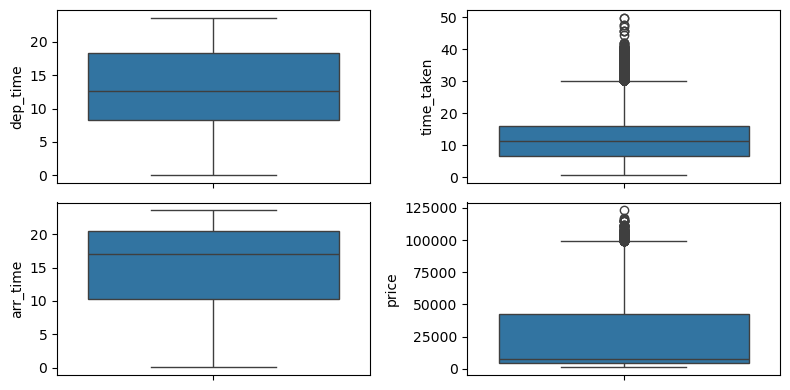

In [191]:
num = ['dep_time','time_taken','arr_time','price']
t = 1
for i in num:
    plt.subplot(2,2,t)
    sns.boxplot(df_raw[i])
    t += 1
plt.tight_layout()
plt.show()

In [193]:
for i in ['time_taken', 'price']:
    print(i)
    print(df_raw[i].min())
    print(df_raw[i].max())
    print()

for i in ['time_taken', 'price']:
    q1 = np.quantile(df_raw[i], 0.25)
    q3 = np.quantile(df_raw[i], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    df_raw[i] = df_raw[i].apply(lambda x: upper if x > upper else (lower if x < lower else x))

for i in ['time_taken', 'price']:
    print(i)
    print(df_raw[i].min())
    print(df_raw[i].max())
    print()

time_taken
0.8333333333333334
49.833333333333336

price
1105.0
123071.0

time_taken
0.8333333333333334
30.29166666666667

price
1105.0
99128.0



In [195]:
df_raw.replace({'no_stop':0,'one_stop':1, '2+_stop': 2}, inplace = True)
df_raw['stop'].unique()

array([0, 1, 2], dtype=int64)

In [197]:
df_enc = pd.get_dummies(df_raw, drop_first=True, dtype='int')
df_enc.head()

,date,num_code,dep_time,time_taken,stop,arr_time,price,airline_AirAsia,airline_GO FIRST,airline_Indigo,...,to_Hyderabad,to_Kolkata,to_Mumbai,class_economy,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,11,868,18.00,2.000000,0,20.00,25612.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,11,624,19.00,2.250000,0,21.15,25612.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,11,531,20.00,24.750000,1,20.45,42220.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,11,839,21.25,26.500000,1,23.55,44450.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,11,544,17.15,6.666667,1,23.55,46690.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [103]:
num = ['dep_time','time_taken','arr_time','price']
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
df_enc[num] = st.fit_transform(df_enc[num])
df_enc.head()

,date,num_code,dep_time,time_taken,stop,arr_time,price,airline_AirAsia,airline_GO FIRST,airline_Indigo,...,to_Hyderabad,to_Kolkata,to_Mumbai,class_economy,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,11,868,0.882712,-1.429372,0,0.738319,0.208503,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,11,624,1.068692,-1.394329,0,0.928429,0.208503,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,11,531,1.254672,1.759497,1,0.812710,0.940531,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,11,839,1.487147,2.004795,1,1.325181,1.038822,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,11,544,0.724629,-0.775245,1,1.325181,1.137555,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, classification_report, f1_score,mean_absolute_percentage_error, root_mean_squared_error
from sklearn.metrics import *
import statsmodels.api as sma
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [105]:
X = df_enc.drop(['price'], axis = 1)
y = df_enc['price']
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=10)

In [106]:
print(df_enc.shape)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(300259, 31)
(210181, 30)
(210181,)
(90078, 30)
(90078,)


In [107]:
import statsmodels.api as sm
import pandas as pd

def forward_selection(x, y, significance_level=0.05):
    initial_features = []
    remaining_features = list(x.columns)
    best_features = []
    
    while remaining_features:
        p_values = []
        for feature in remaining_features:
            model = sm.OLS(y, sm.add_constant(x[initial_features + [feature]])).fit()
            p_values.append((feature, model.pvalues[feature]))
        
        
        p_values = pd.DataFrame(p_values, columns=['feature', 'p_value'])
        p_values = p_values.sort_values(by='p_value')
        
        if p_values.iloc[0]['p_value'] < significance_level:
            best_feature = p_values.iloc[0]['feature']
            initial_features.append(best_feature)
            remaining_features.remove(best_feature)
            best_features = initial_features[:]
        else:
            break
    
    return best_features


selected_features = forward_selection(X, y)
print("Selected Features:", selected_features)


Selected Features: ['num_code', 'time_taken', 'arr_time', 'class_economy', 'stop', 'from_Kolkata', 'airline_AirAsia', 'to_Kolkata', 'airline_Vistara', 'to_Hyderabad', 'from_Hyderabad', 'from_Delhi', 'to_Delhi', 'airline_Indigo', 'airline_GO FIRST', 'airline_SpiceJet', 'day_of_week_Sunday', 'day_of_week_Saturday', 'to_Chennai', 'date', 'airline_StarAir', 'day_of_week_Tuesday', 'day_of_week_Thursday', 'day_of_week_Wednesday', 'day_of_week_Monday', 'from_Mumbai', 'from_Chennai', 'dep_time']


In [108]:
selected_features = ['num_code', 'time_taken', 'arr_time', 'class_economy', 'stop', 'from_Kolkata', 'airline_AirAsia', 
                     'to_Kolkata', 'airline_Vistara', 'to_Hyderabad', 'from_Hyderabad', 'from_Delhi', 'to_Delhi', 
                     'airline_Indigo', 'airline_GO FIRST', 'airline_SpiceJet', 'day_of_week_Sunday', 'day_of_week_Saturday', 
                     'to_Chennai', 'date', 'airline_StarAir', 'day_of_week_Tuesday', 'day_of_week_Thursday', 
                     'day_of_week_Wednesday', 'day_of_week_Monday', 'from_Mumbai', 'from_Chennai', 'dep_time']
len(selected_features)

28

In [109]:
X = df_enc[selected_features]
y = df_enc['price']
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=10)

print(df_enc.shape)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(300259, 31)
(210181, 28)
(210181,)
(90078, 28)
(90078,)


In [110]:
lr = LinearRegression()
model = lr.fit(xtrain, ytrain)
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)
print(f'Training r2 score: {r2_score(ytrain, ypred_train)}')
print(f'Testing r2 score: {r2_score(ytest, ypred_test)}')
print(f'Train MAPE: {mean_absolute_percentage_error(ytrain, ypred_train)}')
print(f'Test MAPE: {mean_absolute_percentage_error(ytest, ypred_test)}')

Training r2 score: 0.9042799065856382
Testing r2 score: 0.9040861297946238
Train MAPE: 1.0909304399202284
Test MAPE: 1.0164907544788406


In [111]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
lasso = Lasso()
model_lasso = lasso.fit(xtrain, ytrain)
ypred_train = model_lasso.predict(xtrain)
ypred_test = model_lasso.predict(xtest)
print(f'Training r2 score: {r2_score(ytrain, ypred_train)}')
print(f'Testing r2 score: {r2_score(ytest, ypred_test)}')
print(f'Train MAPE: {mean_absolute_percentage_error(ytrain, ypred_train)}')
print(f'Test MAPE: {mean_absolute_percentage_error(ytest, ypred_test)}')

Training r2 score: 0.04530123660752372
Testing r2 score: 0.04538870529577044
Train MAPE: 1.0474411126587932
Test MAPE: 1.050631822226348


In [112]:
ridge = Ridge()
model_ridge = ridge.fit(xtrain, ytrain)
ypred_train = model_ridge.predict(xtrain)
ypred_test = model_ridge.predict(xtest)
print(f'Training r2 score: {r2_score(ytrain, ypred_train)}')
print(f'Testing r2 score: {r2_score(ytest, ypred_test)}')
print(f'Train MAPE: {mean_absolute_percentage_error(ytrain, ypred_train)}')
print(f'Test MAPE: {mean_absolute_percentage_error(ytest, ypred_test)}')

Training r2 score: 0.9042798995472601
Testing r2 score: 0.9040862076252054
Train MAPE: 1.0909077936800586
Test MAPE: 1.016470452234931


In [113]:
en = ElasticNet()
model_en = en.fit(xtrain, ytrain)
ypred_train = model_en.predict(xtrain)
ypred_test = model_en.predict(xtest)
print(f'Training r2 score: {r2_score(ytrain, ypred_train)}')
print(f'Testing r2 score: {r2_score(ytest, ypred_test)}')
print(f'Train MAPE: {mean_absolute_percentage_error(ytrain, ypred_train)}')
print(f'Test MAPE: {mean_absolute_percentage_error(ytest, ypred_test)}')

Training r2 score: 0.045301428341799954
Testing r2 score: 0.04538950063165559
Train MAPE: 1.0475912777958958
Test MAPE: 1.0507845263894073


In [114]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
model_gb = gb.fit(xtrain, ytrain)
ypred_train = model_gb.predict(xtrain)
ypred_test = model_gb.predict(xtest)
print(f'Training r2 score: {r2_score(ytrain, ypred_train)}')
print(f'Testing r2 score: {r2_score(ytest, ypred_test)}')
print(f'Train MAPE: {mean_absolute_percentage_error(ytrain, ypred_train)}')
print(f'Test MAPE: {mean_absolute_percentage_error(ytest, ypred_test)}')

Training r2 score: 0.9502457822309274
Testing r2 score: 0.9492346776549618
Train MAPE: 0.4754684705616277
Test MAPE: 0.4528055035892454


In [134]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [91]:
ada = AdaBoostRegressor()
model_ada = ada.fit(xtrain, ytrain)
ypred_train = model_ada.predict(xtrain)
ypred_test = model_ada.predict(xtest)
print(f'Training r2 score: {r2_score(ytrain, ypred_train)}')
print(f'Testing r2 score: {r2_score(ytest, ypred_test)}')
print(f'Train MAPE: {mean_absolute_percentage_error(ytrain, ypred_train)}')
print(f'Test MAPE: {mean_absolute_percentage_error(ytest, ypred_test)}')

Training r2 score: 0.9107914370987606
Testing r2 score: 0.9091121599807722
0.6649540190559609
0.6286198908409766


In [92]:
dt = DecisionTreeRegressor()
model_dt = ada.fit(xtrain, ytrain)
ypred_train = model_dt.predict(xtrain)
ypred_test = model_dt.predict(xtest)
print(f'Training r2 score: {r2_score(ytrain, ypred_train)}')
print(f'Testing r2 score: {r2_score(ytest, ypred_test)}')
print(f'Train MAPE: {mean_absolute_percentage_error(ytrain, ypred_train)}')
print(f'Test MAPE: {mean_absolute_percentage_error(ytest, ypred_test)}')

Training r2 score: 0.8897658355457037
Testing r2 score: 0.8877787776452655
0.6818023036722222
0.6499132503603591


In [94]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
model_xgb = xgb.fit(xtrain, ytrain)
ypred_train = model_xgb.predict(xtrain)
ypred_test = model_xgb.predict(xtest)
print(f'Training r2 score: {r2_score(ytrain, ypred_train)}')
print(f'Testing r2 score: {r2_score(ytest, ypred_test)}')
print(f'Train MAPE: {mean_absolute_percentage_error(ytrain, ypred_train)}')
print(f'Test MAPE: {mean_absolute_percentage_error(ytest, ypred_test)}')

Training r2 score: 0.9771431558041429
Testing r2 score: 0.9755530146455282
Train MAPE: 0.35731385417771805
Test MAPE: 0.3563270854663135


#### scorecard:

In [115]:
mod = []
r_squared_train = []
r_squared_test = []
mse = []
rmse = []
mae = []
mape = []

def model_validation(model, xtrain, ytrain, xtest, ytest):
    global scorecard
    
    # Fit the model
    m = model
    m.fit(xtrain, ytrain)
    
    # Predict values
    y_pred_train = m.predict(xtrain)
    y_pred_test = m.predict(xtest)

    # Calculate metrics
    print('R-Squared Train: ', r2_score(ytrain, y_pred_train))
    print('R-Squared Test: ', r2_score(ytest, y_pred_test))
    print('Mean squared error: ', mean_squared_error(ytest, y_pred_test))
    print('Root mean squared error: ', mean_squared_error(ytest, y_pred_test)**0.5)
    print('Mean absolute error: ', mean_absolute_error(ytest, y_pred_test))
    print('Mean absolute percentage error: ', mean_absolute_percentage_error(ytest, y_pred_test))
    
    # Residuals plot
    residuals = ytest - y_pred_test
    plt.scatter(y_pred_test, residuals)
    plt.axhline(0, color='r', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f'Residuals Plot')
    plt.show()
    
    # Save results
    ans = input('Do you want to save the result? Y/N: ')
    if ans.lower() == 'y':
        mod.append(str(model))
        r_squared_train.append(r2_score(ytrain, y_pred_train))
        r_squared_test.append(r2_score(ytest, y_pred_test))
        mse.append(mean_squared_error(ytest, y_pred_test))
        rmse.append(mean_squared_error(ytest, y_pred_test)**0.5)
        mae.append(mean_absolute_error(ytest, y_pred_test))
        mape.append(mean_absolute_percentage_error(ytest, y_pred_test))
        scorecard = pd.DataFrame({
            'Model': mod,
            'R-squared Train': r_squared_train,
            'R-squared Test': r_squared_test,
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'MAPE': mape
        })
    else:
        return

R-Squared Train:  0.9042799065856382
R-Squared Test:  0.9040861297946238
Mean squared error:  0.09585032053655355
Root mean squared error:  0.3095970292760471
Mean absolute error:  0.2111735873965516
Mean absolute percentage error:  1.0164907544788406


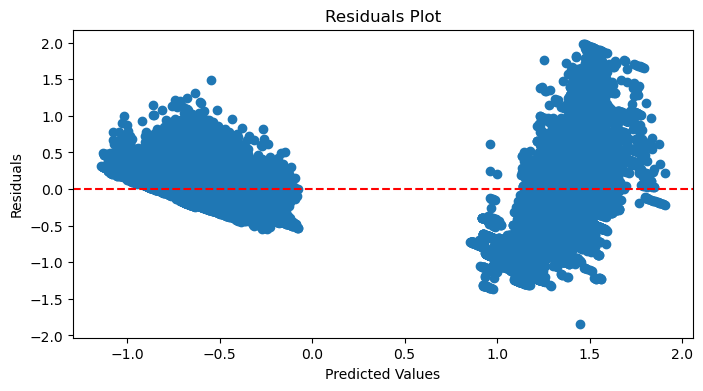

Do you want to save the result? Y/N:  y


In [116]:
model_validation(LinearRegression(), xtrain, ytrain, xtest, ytest)

R-Squared Train:  0.04530123660752372
R-Squared Test:  0.04538870529577044
Mean squared error:  0.9539787977410377
Root mean squared error:  0.9767183820022216
Mean absolute error:  0.8416954279684963
Mean absolute percentage error:  1.050631822226348


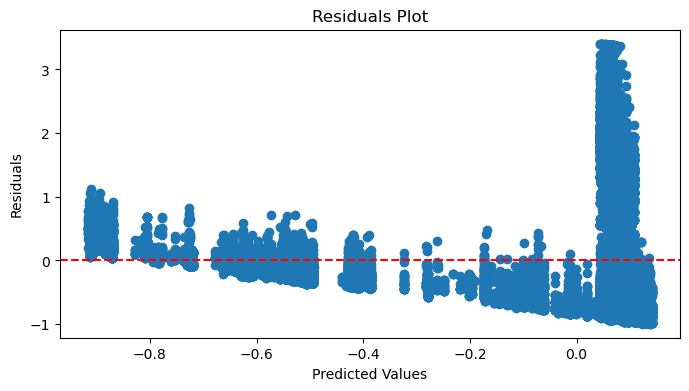

Do you want to save the result? Y/N:  y


In [122]:
model_validation(Lasso(), xtrain, ytrain, xtest, ytest)

In [117]:
parameters = {'alpha': [0.0001,0.001, 0.01, 0.1], 
              'max_iter': [500, 1000, 5000]}
gridcv = GridSearchCV(estimator=Lasso(), param_grid= parameters, cv = 3, n_jobs= 8)

gridcv.fit(xtrain, ytrain)

gridcv.best_params_

{'alpha': 0.0001, 'max_iter': 500}

R-Squared Train:  0.904264234740851
R-Squared Test:  0.9040783286882487
Mean squared error:  0.09585811647414827
Root mean squared error:  0.3096096194793506
Mean absolute error:  0.2110006115431912
Mean absolute percentage error:  1.0164312245644442


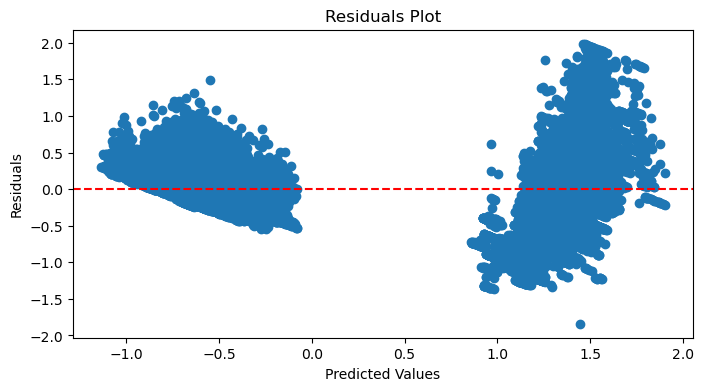

Do you want to save the result? Y/N:  y


In [123]:
model_validation(Lasso(alpha= 0.0001, max_iter= 500), xtrain, ytrain, xtest, ytest)

R-Squared Train:  0.9042798995472601
R-Squared Test:  0.9040862076252054
Mean squared error:  0.09585024275754005
Root mean squared error:  0.30959690366271436
Mean absolute error:  0.21117229187000489
Mean absolute percentage error:  1.016470452234931


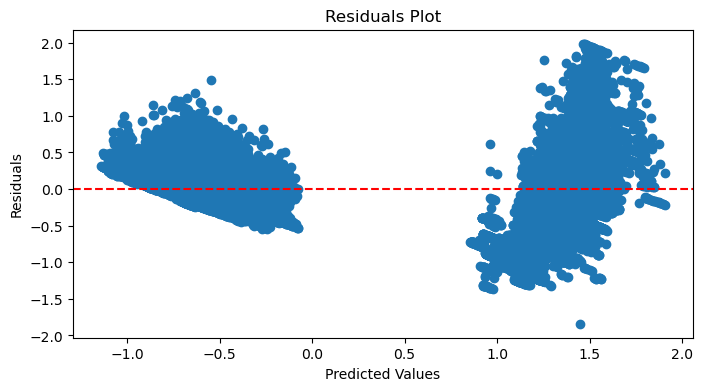

Do you want to save the result? Y/N:  y


In [124]:
model_validation(Ridge(), xtrain, ytrain, xtest, ytest)

In [125]:
parameters = {'alpha': [0.0001,0.001, 0.01, 0.1], 
              'max_iter': [500, 1000, 5000]}
gridcv = GridSearchCV(estimator=Ridge(), param_grid= parameters, cv = 3, n_jobs= 8)

gridcv.fit(xtrain, ytrain)

gridcv.best_params_

{'alpha': 0.1, 'max_iter': 500}

R-Squared Train:  0.9042799065125429
R-Squared Test:  0.9040861381699791
Mean squared error:  0.09585031216674747
Root mean squared error:  0.3095970157587884
Mean absolute error:  0.21117343960149926
Mean absolute percentage error:  1.0164887009860843


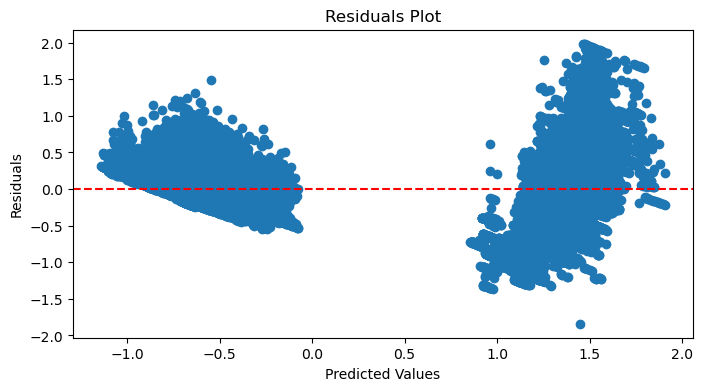

Do you want to save the result? Y/N:  n


In [127]:
model_validation(Ridge(alpha=0.1, max_iter= 500), xtrain, ytrain, xtest, ytest)

R-Squared Train:  0.045301428341799954
R-Squared Test:  0.04538950063165559
Mean squared error:  0.9539780029321183
Root mean squared error:  0.9767179751249172
Mean absolute error:  0.8417079998007378
Mean absolute percentage error:  1.0507845263894073


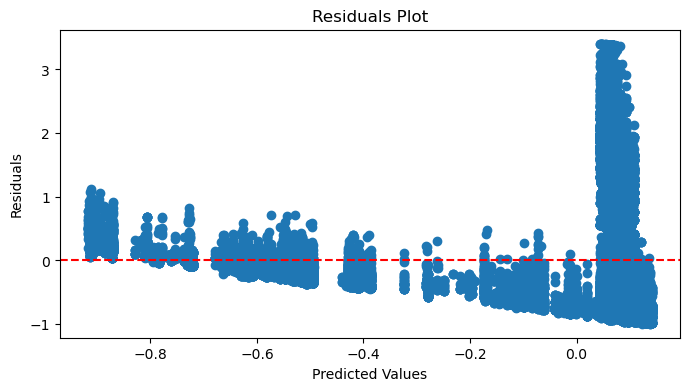

Do you want to save the result? Y/N:  y


In [128]:
model_validation(ElasticNet(), xtrain, ytrain, xtest, ytest)

In [129]:
parameters = {'alpha': [0.0001,0.001, 0.01, 0.1], 
              'max_iter': [500, 1000, 5000]}
gridcv = GridSearchCV(estimator=ElasticNet(), param_grid= parameters, cv = 3, n_jobs= 8)

gridcv.fit(xtrain, ytrain)

gridcv.best_params_

{'alpha': 0.0001, 'max_iter': 500}

R-Squared Train:  0.9042666092019742
R-Squared Test:  0.9040776343185358
Mean squared error:  0.09585881038379243
Root mean squared error:  0.30961074009761425
Mean absolute error:  0.21108813355526745
Mean absolute percentage error:  1.0162941411720956


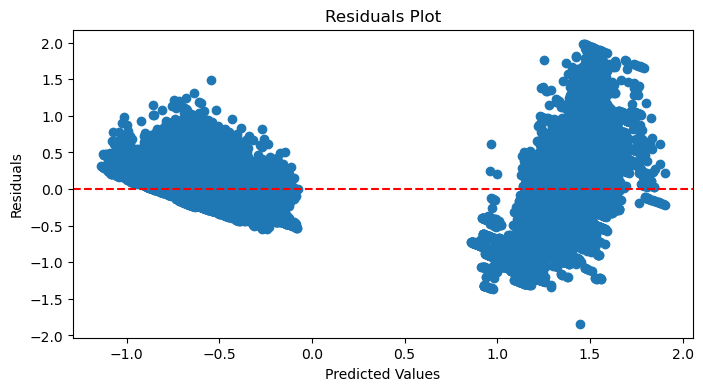

Do you want to save the result? Y/N:  y


In [130]:
model_validation(ElasticNet(alpha=0.0001, max_iter=500), xtrain, ytrain, xtest, ytest)

R-Squared Train:  0.9917628770580864
R-Squared Test:  0.9724173960387311
Mean squared error:  0.027564328550806854
Root mean squared error:  0.1660250841011889
Mean absolute error:  0.09464620580037551
Mean absolute percentage error:  0.33020048106548466


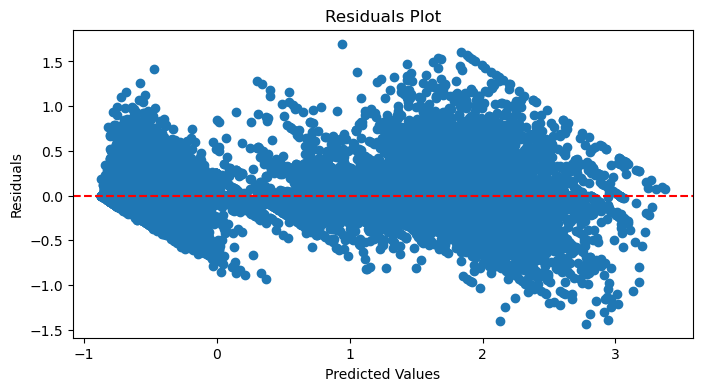

Do you want to save the result? Y/N:  y


In [133]:
model_validation(RandomForestRegressor(), xtrain, ytrain, xtest, ytest)

R-Squared Train:  0.9266477328363238
R-Squared Test:  0.9250124834924591
Mean squared error:  0.0749378320163438
Root mean squared error:  0.2737477525320414
Mean absolute error:  0.18777658053399088
Mean absolute percentage error:  0.6295150603365322


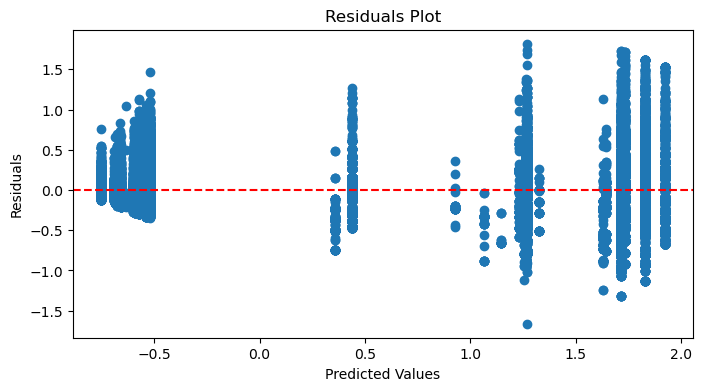

Do you want to save the result? Y/N:  y


In [135]:
model_validation(AdaBoostRegressor(), xtrain, ytrain, xtest, ytest)

In [ ]:
parameters = {'n_estimators': [100, 200, 500], 
              'learning_rate': [0.01, 0.05, 0.1]}
gridcv = GridSearchCV(estimator=AdaBoostRegressor(), param_grid= parameters, cv = 3, n_jobs= -1)

gridcv.fit(xtrain, ytrain)

gridcv.best_params_

In [ ]:
model_validation(GradientBoostingRegressor(), xtrain, ytrain, xtest, ytest)

In [ ]:
parameters = {'n_estimators': [100, 200, 500], 
              'max_depth': [5, 10], 
              'min_samples_split': [5, 10], 
              'min_samples_leaf': [2, 5], 
              'max_features': ['sqrt', None]}

gridcv = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid= parameters, cv = 3, n_jobs= 6)

gridcv.fit(xtrain, ytrain)

gridcv.best_params_